In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

2024-07-19 14:05:17.725836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 14:05:17.784111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 14:05:17.799717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 14:05:17.889191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 14:05:18.775678: W tensorflow/compiler/tf2

In [2]:
tf.__version__

'2.17.0'

In [3]:
keras.__version__

'3.4.1'

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [5]:
X_train.shape

(5000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

For simplicity, I scale the pixes down to 0-1 range

In [7]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.5

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

You can find the name of each index [here](https://keras.io/api/datasets/fashion_mnist/)

In [9]:
class_names = [
    "T-shirt/top",
    "rouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
class_names

['T-shirt/top',
 'rouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
np.random.seed(42)
indexes = np.random.randint(len(X_train), size=40)
indexes

array([ 860, 3772, 3092,  466, 4426, 3444, 3171, 2919,  130, 1685,  769,
       2391, 2433, 1184, 4555, 3385, 4117, 4843, 2904,  474, 1082, 2558,
       2047, 2747,  975, 1806,  189, 2734, 3005, 4658, 1899, 1267, 1528,
       3202, 3556, 3890,  646, 2888, 2435,  600])

In [11]:
img_sample, label_sample = X_train[indexes], y_train[indexes]
img_sample.shape, label_sample.shape

((40, 28, 28), (40,))

In [12]:
img_sample.dtype

dtype('float64')

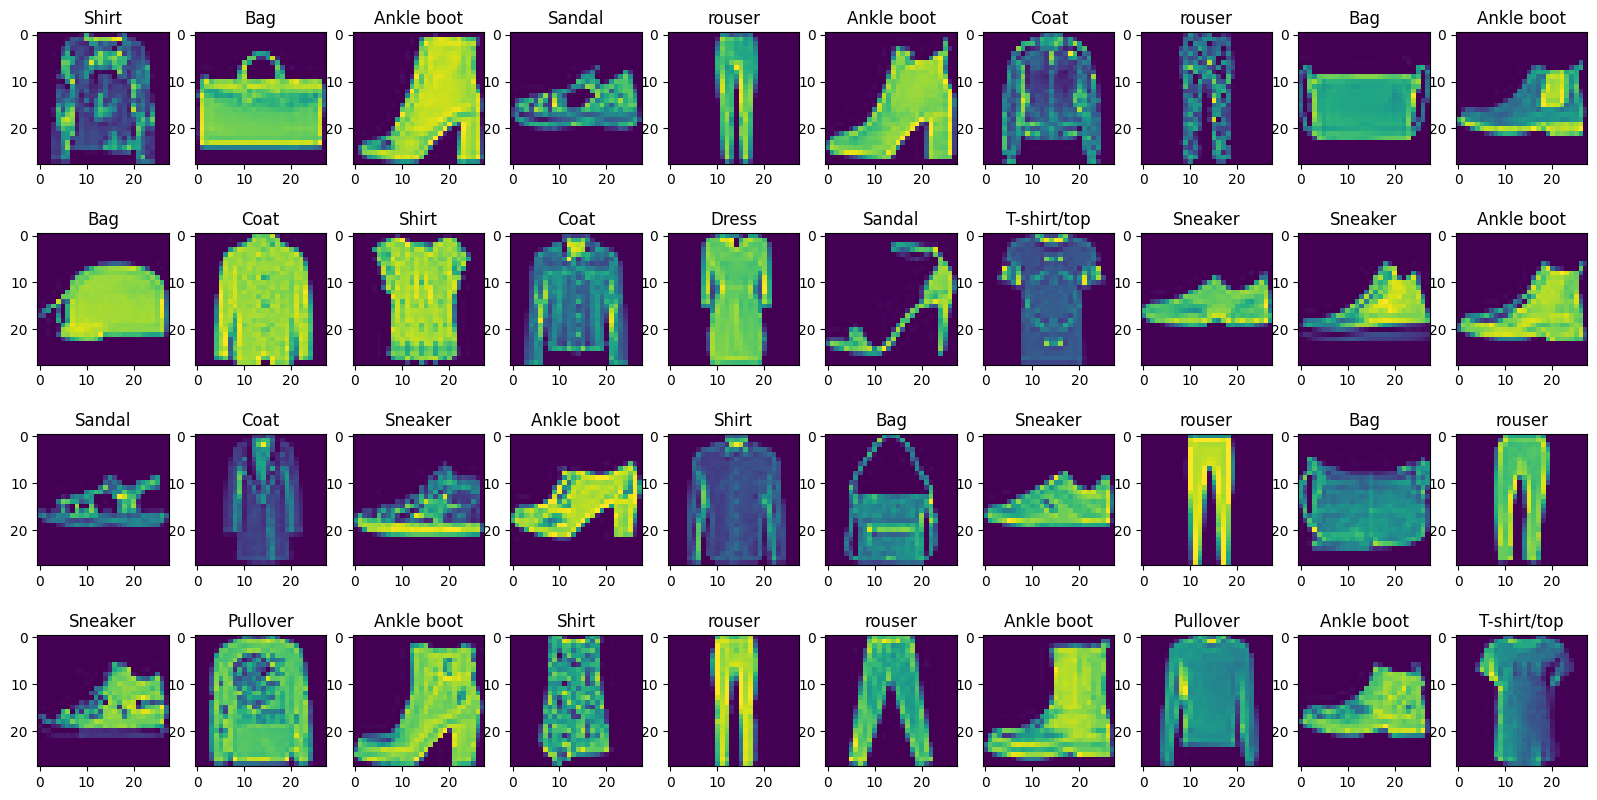

In [13]:
f, axes = plt.subplots(4, 10, figsize=(20, 10))

for i, img in enumerate(img_sample):
    ax = axes[i // 10, i % 10]
    ax.imshow(img)
    ax.set_title(class_names[label_sample[i]])
plt.show()

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

I0000 00:00:1721390721.935616    7554 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-19 14:05:22.051539: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3761 - loss: 1.8679 - val_accuracy: 0.6782 - val_loss: 1.0862
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7002 - loss: 0.9718 - val_accuracy: 0.7314 - val_loss: 0.8423
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7460 - loss: 0.7697 - val_accuracy: 0.7480 - val_loss: 0.7516
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7765 - loss: 0.6778 - val_accuracy: 0.7594 - val_loss: 0.7014
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7889 - loss: 0.6216 - val_accuracy: 0.7663 - val_loss: 0.6683
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8011 - loss: 0.5820 - val_accuracy: 0.7720 - val_loss: 0.6436
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8123 - loss: 0.5519 - val_accuracy: 0.7772 - val_loss: 0.6240
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8227 - loss: 0.5278 - val_accuracy: 0

In [19]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.5336,1.528832,0.678218,1.086242
1,0.7168,0.905160,0.731418,0.842292
2,0.7552,0.742138,0.748036,0.751621
3,0.7816,0.661773,0.759364,0.701360
4,0.7956,0.610913,0.766291,0.668258
5,0.8076,0.574272,0.772000,0.643554
6,0.8188,0.546127,0.777200,0.624037
7,0.8278,0.523329,0.782145,0.607531
8,0.8346,0.504232,0.787145,0.593865
9,0.8400,0.487938,0.791291,0.581467


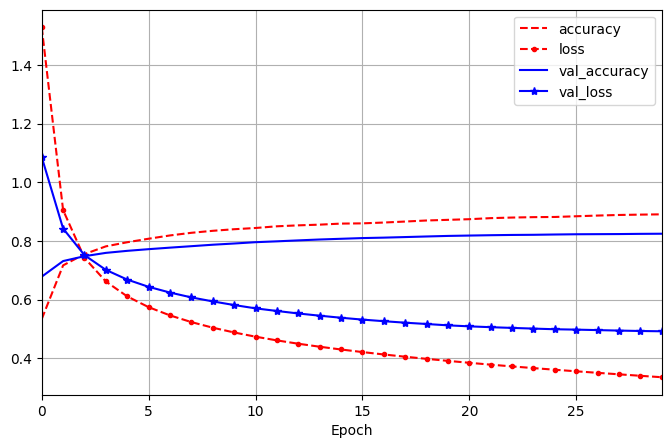

In [20]:
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],
)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8181 - loss: 0.5108


[0.5162942409515381, 0.8154000043869019]

In [24]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.13, 0.02, 0.7 ],
       [0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [33]:
y_pred_names = np.array(class_names)[y_pred]
y_pred_names

array(['Ankle boot', 'Pullover', 'rouser'], dtype='<U11')

In [31]:
X_sample.shape

(3, 28, 28)

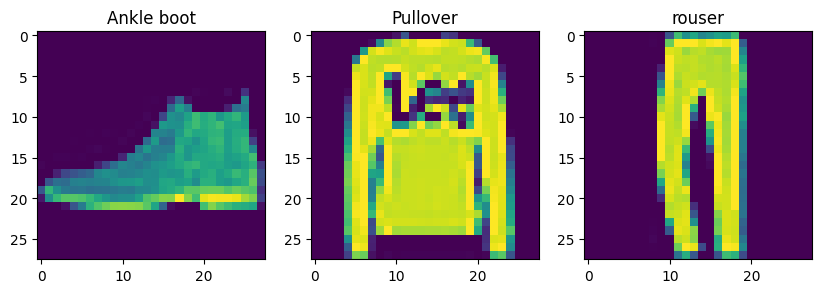

In [34]:
f, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, img in enumerate(X_sample):
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(y_pred_names[i])
plt.show()